<a href="https://colab.research.google.com/github/uss96/CodingTest/blob/master/%EB%B9%85%EB%B6%84%EA%B8%B0%EC%8B%A4%EA%B8%B0(%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


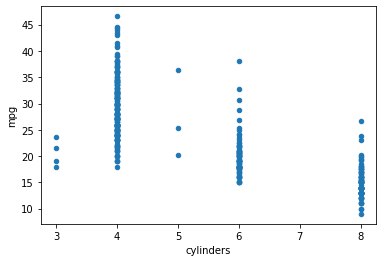

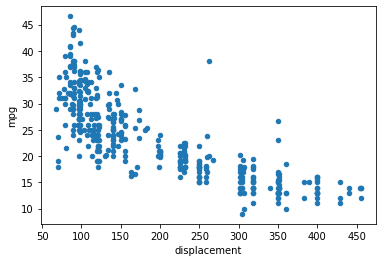

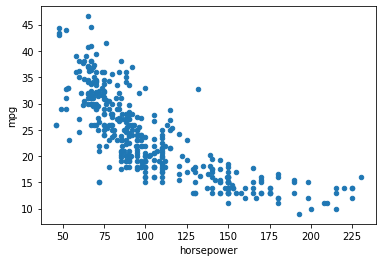

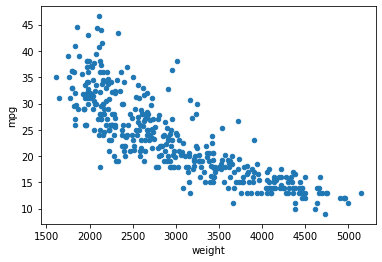

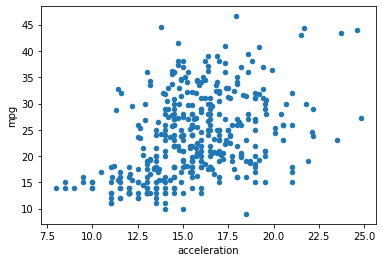

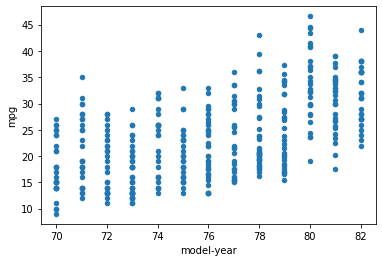

In [8]:
df.plot(kind = 'scatter', x = 'cylinders', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'displacement', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'weight', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'acceleration', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'model-year', y = 'mpg')
plt.show()

In [9]:
df = df.dropna(axis = 0)

In [10]:
X = df[["weight"]]
y = df["mpg"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
print("기울기 a : ", lr.coef_)
print("y절편 b : ", lr.intercept_)

기울기 a :  [-0.00760176]
y절편 b :  45.92494220674336


In [15]:
pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.6128515290885201


In [19]:
pred = lr.predict(X_train)

score = r2_score(y_train, pred)
print(score)

0.7122320393751094


In [20]:
corr = df.corr(method = "pearson")
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775680     -0.804711   -0.777575 -0.832725   
cylinders    -0.775680   1.000000      0.950706    0.843751  0.896058   
displacement -0.804711   0.950706      1.000000    0.897787  0.932729   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.832725   0.896058      0.932729    0.864350  1.000000   
acceleration  0.421159  -0.504844     -0.542713   -0.687241 -0.415462   
model-year    0.581144  -0.352554     -0.374620   -0.420697 -0.311774   

              acceleration  model-year  
mpg               0.421159    0.581144  
cylinders        -0.504844   -0.352554  
displacement     -0.542713   -0.374620  
horsepower       -0.687241   -0.420697  
weight           -0.415462   -0.311774  
acceleration      1.000000    0.294588  
model-year        0.294588    1.000000  


In [21]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [25]:
fetch_housing_data()

In [26]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)    

In [27]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
housing.dropna(axis = 0, inplace=True)
housing.drop("ocean_proximity", axis = 1, inplace=True)

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [33]:
corr = housing.corr(method="pearson")
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [35]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
print("기울기 : ", lr.coef_)
print("y절편 : ", lr.intercept_)

기울기 :  [-4.21262308e+04 -4.20623763e+04  1.18784999e+03 -8.57874086e+00
  1.18123421e+02 -3.55751755e+01  3.73676747e+01  4.03297253e+04]
y절편 :  -3530241.307796566


In [39]:
pred = lr.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.6445130291082337


In [41]:
pred = lr.predict(X_train)

score = r2_score(y_train, pred)
print(score)

0.6334125389213838


In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


In [46]:
dtr = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [47]:
pred = dtr.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6793101269.876856


In [50]:
pred = dtr.predict(X_train)
mse = mean_squared_error(y_train, pred)
print(mse)

6684086804.552605


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
X = housing.drop("median_house_value", axis= 1)
y = housing["median_house_value"]

In [53]:
rfr = RandomForestRegressor(max_depth = 3, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [54]:
pred = rfr.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6447828605.376922


In [57]:
pred = rfr.predict(X_train)
mse = mean_squared_error(y_train, pred)
print(mse)

6342421033.759215
